<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/2.%20%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практика Pandas

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/1.%20%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F/2.%20%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_Pandas.ipynb)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.0.2'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [2]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [3]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [4]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

In [34]:
zero_counts = (df == 0).sum(axis=0)
zero_counts[zero_counts != 0].index.tolist()

['capital.gain', 'capital.loss']

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: Пропуски могут быть связаны с тем, что не у всех в данном датасете есть информация о доходах и потерях, полученных из инвестиций. Вероятно, большинство людей в данной выборке не имели значительных инвестиций или не указывали эту информацию при заполнении анкеты

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [6]:
df['workclass'].value_counts()

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [23]:
df.groupby(['sex'])['age'].agg(lambda x: x.unique().mean())

sex
 Female    52.541667
 Male      52.555556
Name: age, dtype: float64

8) Постройте гистограмму(bar) распределения образования людей (education)

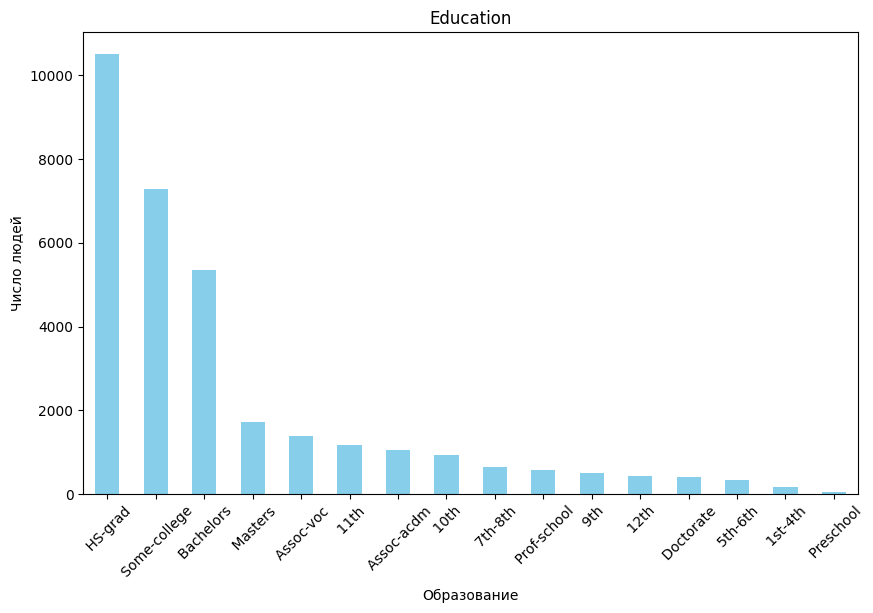

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Education')
plt.xlabel('Образование')
plt.ylabel('Число людей')
plt.xticks(rotation=45)
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [44]:
high_income = df[df['income'] == ' >50K']
low_income = df[df['income'] == ' <=50K']

mean_age_high_income = high_income['age'].mean()
std_age_high_income = high_income['age'].std()

mean_age_low_income = low_income['age'].mean()
std_age_low_income = low_income['age'].std()

print(f"Средний возраст для тех, кто получает более 50K: {mean_age_high_income:.2f} лет")
print(f"Среднеквадратичное отклонение возраста для тех, кто получает более 50K: {std_age_high_income:.2f} лет")
print(f"Средний возраст для тех, кто получает менее 50K: {mean_age_low_income:.2f} лет")
print(f"Среднеквадратичное отклонение возраста для тех, кто получает менее 50K: {std_age_low_income:.2f} лет")

Средний возраст для тех, кто получает более 50K: 44.25 лет
Среднеквадратичное отклонение возраста для тех, кто получает более 50K: 10.52 лет
Средний возраст для тех, кто получает менее 50K: 36.78 лет
Среднеквадратичное отклонение возраста для тех, кто получает менее 50K: 14.02 лет


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [47]:
high_income = df[df['income'] == ' >50K']

high_income_below_bachelors = high_income[~high_income['education'].isin([' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate'])]

if high_income_below_bachelors.empty:
    print("Правда, что все люди, получающие более 50K, имеют как минимум высшее образование.")
else:
    print("Неправда, что все люди, получающие более 50K, имеют как минимум высшее образование.")

Неправда, что все люди, получающие более 50K, имеют как минимум высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [49]:
married_male = df[(df['sex'] == ' Male') & (df['marital.status'].str.startswith(' Married'))]
not_married_male = df[(df['sex'] == ' Male') & (~df['marital.status'].str.startswith(' Married'))]

ratio_high_income_married = len(married_male[married_male['income'] == ' >50K']) / len(married_male)
ratio_high_income_not_married = len(not_married_male[not_married_male['income'] == ' >50K']) / len(not_married_male)

if ratio_high_income_married > ratio_high_income_not_married:
    print("Среди женатых мужчин больше доля зарабатывающих много (>50K).")
elif ratio_high_income_married < ratio_high_income_not_married:
    print("Среди холостых мужчин больше доля зарабатывающих много (>50K).")
else:
    print("Доля зарабатывающих много среди женатых и холостых мужчин одинакова.")

Среди женатых мужчин больше доля зарабатывающих много (>50K).


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [54]:
df.groupby(['native.country', 'income'])['hours.per.week'].mean().unstack()

income,<=50K,>50K
native.country,,
?,40.164760,45.547945
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [6]:
def create_range(diff):
    if diff < 0:
        return 'Loss'
    elif diff == 0:
        return 'No Gain/Loss'
    elif 0 < diff <= 1000:
        return '0-1000'
    elif 1000 < diff <= 5000:
        return '1000-5000'
    else:
        return '5000+'

df['capital_diff_range'] = df.apply(lambda row: create_range(row['capital.gain'] - row['capital.loss']), axis=1)

pivot_table = pd.pivot_table(df, values='income', index='capital_diff_range', columns='education', aggfunc='count', fill_value=0)
pivot_table

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
capital_diff_range,,,,,,,,,,,,,,,,
0-1000,2,5,3,0,0,0,4,0,2,3,1,18,2,0,0,15
1000-5000,28,27,11,4,9,33,24,33,61,144,11,358,48,1,12,205
5000+,10,21,8,1,5,8,3,49,71,486,64,307,224,1,137,253
Loss,28,33,8,4,11,23,9,55,54,338,53,403,149,2,64,285
No Gain/Loss,865,1089,403,159,308,582,474,930,1194,4384,284,9415,1300,47,363,6533


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [62]:
high_income_women = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]

average_income_by_country = high_income_women.groupby('native.country')['income'].count()

country_with_highest_income = average_income_by_country.idxmax()

country_with_highest_income

' United-States'

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [65]:
import numpy as np

df['magic_salary'] = np.where(df['income'] == ' <=50K', np.random.randint(0, 51, size=len(df)), np.random.randint(51, 201, size=len(df)))

mean_hourly_salary_by_education = df.groupby('education')['magic_salary'].mean()
mean_hourly_salary_by_education

education
 10th            31.664523
 11th            30.122553
 12th            32.923788
 1st-4th         28.267857
 5th-6th         29.876877
 7th-8th         31.106811
 9th             30.163424
 Assoc-acdm      49.275539
 Assoc-voc       51.015195
 Bachelors       66.895798
 Doctorate       97.978208
 HS-grad         40.497857
 Masters         80.952409
 Preschool       26.647059
 Prof-school     98.465278
 Some-college    44.154986
Name: magic_salary, dtype: float64